In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data= pd.read_csv(r'D:\Coding\python\Loan\application_data.csv')

In [89]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
data.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [91]:
data.shape

(307511, 122)

In [92]:
d=data.isnull().sum()
d[d>0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

In [93]:
data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mode, inplace=True)

In [94]:
data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
#Below columns is in object data type which is actually float, so converting it's datatype
data['AMT_ANNUITY']=pd.to_numeric(data['AMT_ANNUITY'],errors='coerce')

In [96]:
col_unused = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
data.drop(columns=col_unused, inplace=True)

Unwanted Columns are removed

In [97]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 

In [98]:
data['CODE_GENDER'].value_counts()
data=data[data['CODE_GENDER']!='XNA']
data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

Text(0.5, 1.0, 'AMOUNT ANNUTIY')

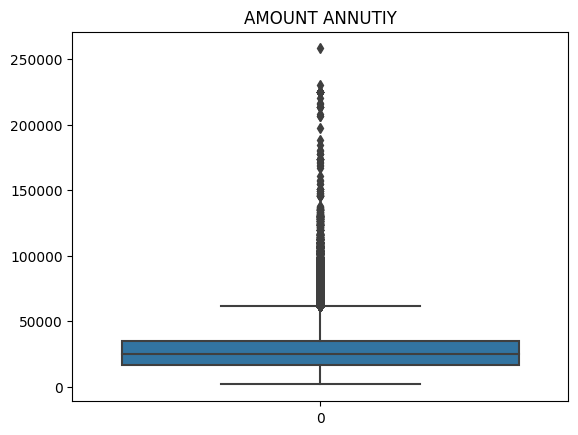

In [99]:
sns.boxplot(data['AMT_ANNUITY']).set_title('AMOUNT ANNUTIY')

Text(0.5, 1.0, 'TOTAL INCOME')

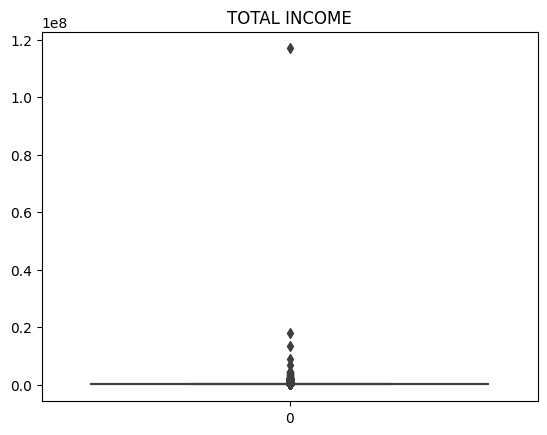

In [100]:
sns.boxplot(data['AMT_INCOME_TOTAL']).set_title('TOTAL INCOME')

In [101]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
lab = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

In [102]:
data['AMT_INCOME_RANGE'] = pd.cut(data['AMT_INCOME_TOTAL'], bins = bins,labels=lab)
data['AMT_INCOME_RANGE']

C:\Users\aclog\AppData\Local\Temp\ipykernel_18056\3496281438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AMT_INCOME_RANGE'] = pd.cut(data['AMT_INCOME_TOTAL'], bins = bins,labels=lab)


0         200000-300000
1         200000-300000
2               <100000
3         100000-200000
4         100000-200000
              ...      
307506    100000-200000
307507          <100000
307508    100000-200000
307509    100000-200000
307510    100000-200000
Name: AMT_INCOME_RANGE, Length: 307507, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [103]:
data['AMT_GOODS_PRICE']=pd.cut(data['AMT_GOODS_PRICE'],bins=bins,labels=lab)
data['AMT_GOODS_PRICE']

C:\Users\aclog\AppData\Local\Temp\ipykernel_18056\172911913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AMT_GOODS_PRICE']=pd.cut(data['AMT_GOODS_PRICE'],bins=bins,labels=lab)


0            300000-400000
1         500000 and above
2            100000-200000
3            200000-300000
4         500000 and above
                ...       
307506       200000-300000
307507       200000-300000
307508    500000 and above
307509       300000-400000
307510    500000 and above
Name: AMT_GOODS_PRICE, Length: 307507, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [104]:
data['AMT_CREDIT']=pd.cut(data['AMT_CREDIT'],bins=bins, labels=lab)
data['AMT_CREDIT']

C:\Users\aclog\AppData\Local\Temp\ipykernel_18056\3132487739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AMT_CREDIT']=pd.cut(data['AMT_CREDIT'],bins=bins, labels=lab)


0            400000-500000
1         500000 and above
2            100000-200000
3            300000-400000
4         500000 and above
                ...       
307506       200000-300000
307507       200000-300000
307508    500000 and above
307509       300000-400000
307510    500000 and above
Name: AMT_CREDIT, Length: 307507, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [105]:
# Dividing the dataset into two dataset of Target=1(client with payment difficulties) and Target=0(all other)
Target0 = data.loc[data['TARGET'] == 0]
Target1 = data.loc[data['TARGET'] == 1]

                                                            RATIO OF IMBALANCE

In [106]:
ratio= len(Target0)/len(Target1)
round(ratio,2)

11.39

<Axes: xlabel='CODE_GENDER', ylabel='count'>

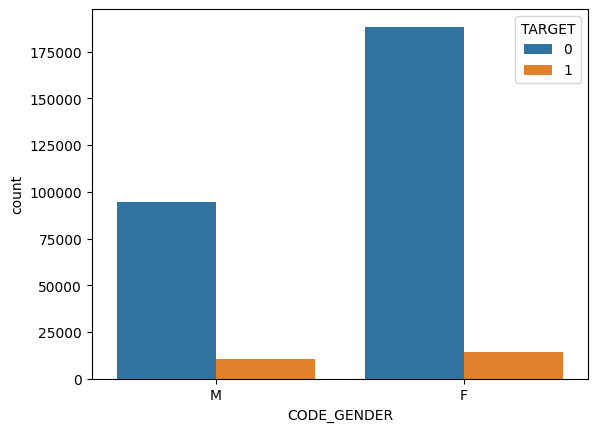

In [107]:
sns.countplot(x='CODE_GENDER',hue='TARGET',data=data)

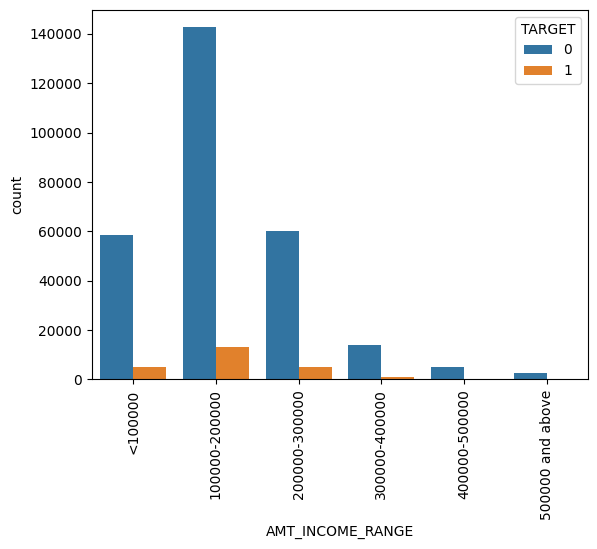

In [110]:
sns.countplot(x='AMT_INCOME_RANGE',hue='TARGET',data=data)
plt.xticks(rotation=90)
plt.show()

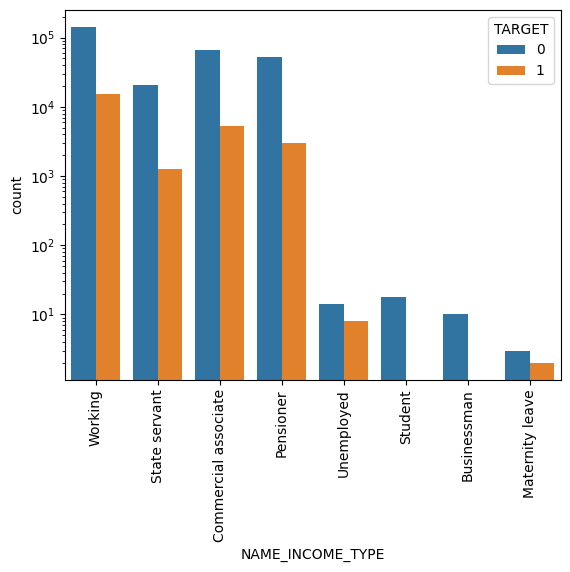

In [114]:
sns.countplot(x='NAME_INCOME_TYPE',hue='TARGET',data=data)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

                                                    CONCLUSION

1) CODE GENDER:
The % of defaulters are more in Male than Female

2) AMT_INCOME_RANGE :
People in range 100000-200000 have high number of loan and also have high in defaulter
Income segment >500000 has less defaulter.

3) NAME_INCOME_TYPE:
Student and business are higher in percentage of loan repayment.
Working, State servent and Commercial associates are higher in default percentage.
Maternity category is significantly higher problem in repayment.